In [15]:
import pandas as pd

summaries = []
MODELS = ["gpt-3.5-turbo", "gpt-4", "insolvency_bot_with_gpt-3.5-turbo", "insolvency_bot_with_gpt-4"]
DATASETS = ["train", "test"]

for MODEL in MODELS:
    for DATASET in DATASETS:
        df = pd.read_csv(f"scores_{DATASET}_{MODEL}.csv", encoding="utf-8", sep="\t")
        
        # Drop the TOTAL row
        df = df[df.question_no != "TOTAL"]
        
        summaries.append((MODEL, DATASET, df.bot_response_time.median(),  df["bot_score"].sum(), df["max_points_available"].sum()))

In [26]:
df_summary = pd.DataFrame()
df_summary["model"] = [s[0] for s in summaries]
df_summary["dataset"] = [s[1] for s in summaries]
df_summary["median_response_time"] = [s[2] for s in summaries]
df_summary["total_score"] = [s[3] for s in summaries]
df_summary["available_score"] = [s[4] for s in summaries]

In [27]:
df_summary["percentage_score"] = df_summary.total_score / df_summary.available_score * 100

In [28]:
df_summary

,model,dataset,median_response_time,total_score,available_score,percentage_score
0,gpt-3.5-turbo,train,5.222760,0.0,25,0.0
1,gpt-3.5-turbo,test,2.955363,0.0,6,0.0
2,gpt-4,train,21.641649,0.0,25,0.0
3,gpt-4,test,7.643979,0.0,6,0.0
4,insolvency_bot_with_gpt-3.5-turbo,train,8.877035,1.5,25,6.0
5,insolvency_bot_with_gpt-3.5-turbo,test,7.420558,0.0,6,0.0
6,insolvency_bot_with_gpt-4,train,30.769446,0.0,25,0.0
7,insolvency_bot_with_gpt-4,test,26.805294,1.5,6,25.0


In [25]:
df_summary.to_csv("score_summary.csv", encoding="utf-8", sep="\t", index=False)

In [18]:
import numpy as np

In [19]:
import fastdatascience

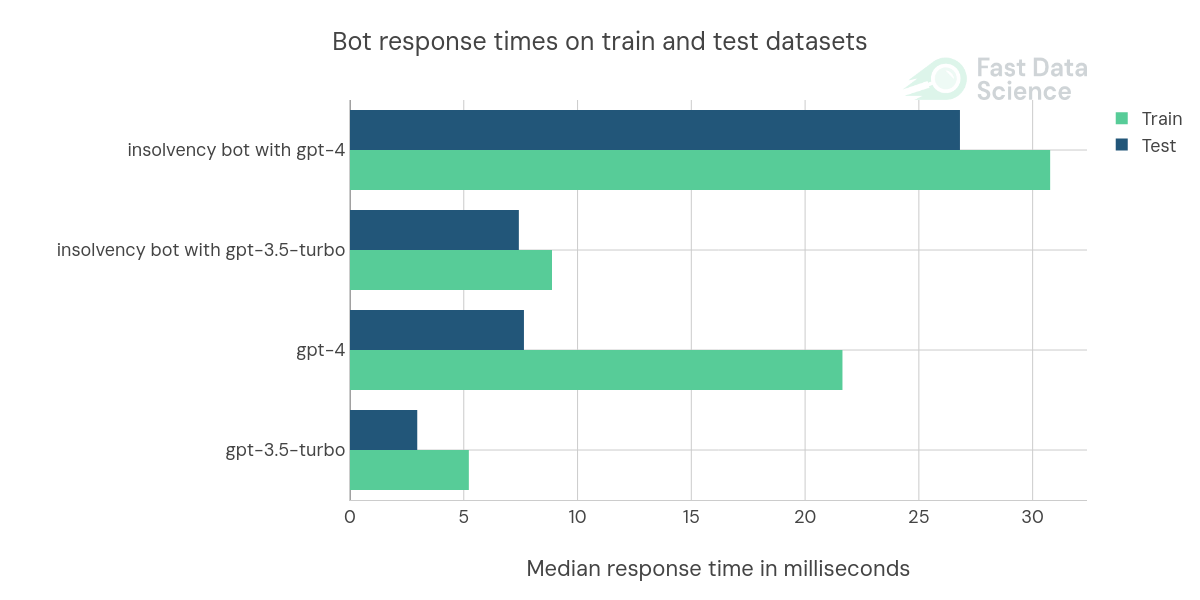

In [20]:
import re
import plotly.graph_objects as px
import numpy
 
 
 
fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].median_response_time),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].median_response_time),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)

fig.update_layout(
    title="Bot response times on train and test datasets",
    margin=dict(l=350, r=100, t=100, b=100),
    xaxis_title="Median response time in milliseconds",
)

fig.show(renderer="png")

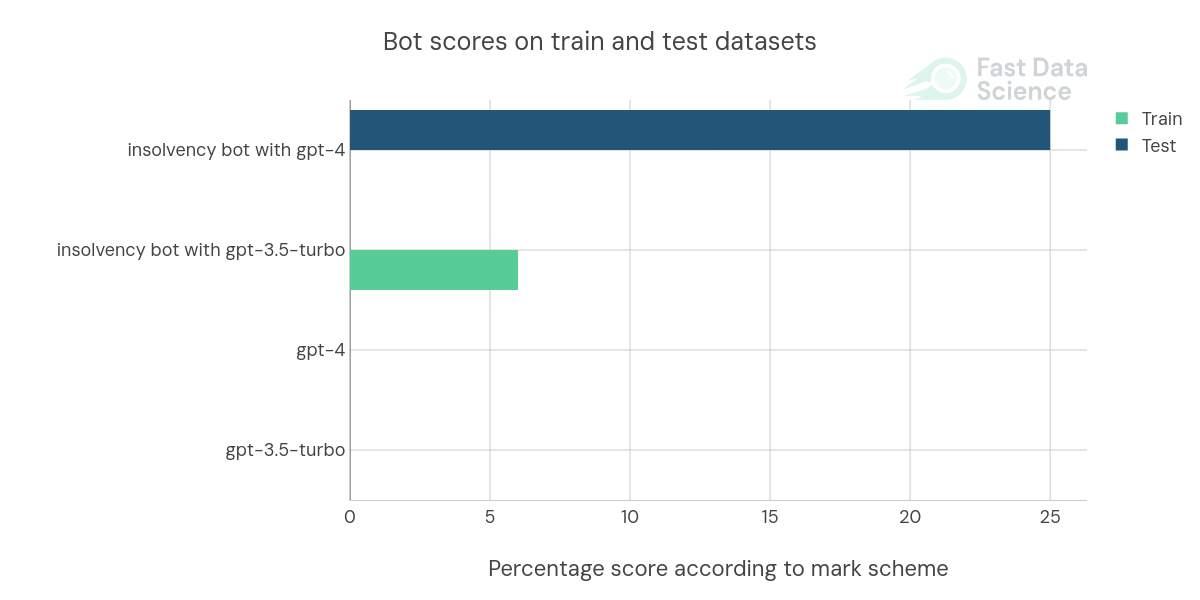

In [24]:
import re
import plotly.graph_objects as px
import numpy
 
 
 
fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].percentage_score),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].percentage_score),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)

fig.update_layout(
    title="Bot scores on train and test datasets",
    margin=dict(l=350, r=100, t=100, b=100),
    xaxis_title="Percentage score according to mark scheme",
)

fig.show(renderer="png")